<a href="https://colab.research.google.com/github/timberking2/ML_magistr/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas seaborn scikit-learn

# Домашнее задание про практике 2

- Провести разведочный анализ EDA (описать полученный результат). Тут важно, влияет ли X[i] на Y (примеры в практике 2)
- Описать полученный результат относительно анализа целевой перменной и зависимой (см. практика 2)
- Подобороться с пропусками в данных (при наличии в датасете). Объяснить способ выборка борьбы с пропуском
- Обучить модель линейной регресии на всей выборке X, y. Вывести метрики
- Сделать train_test_split и обучить на обучающей выборке. Предсказать результат на обучающей и тестовой выборках. Вывести метрики, объяснить полученный результат

In [28]:
import pandas as pd

In [27]:
df = pd.read_csv("student-mat.csv")
df #для себя глянуть че я вообще хочу и на чем буду баловаться ыыы

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [29]:
# преобразовать категориальные признаки в category
# df['column'] = df.column.astye('category')

df['school'] = df['school'].astype('category')
df['sex'] = df['sex'].astype('category')
df['age'] = df['age'].astype('int')
df['address'] = df['address'].astype('category')
df['famsize'] = df['famsize'].astype('category')
df['Pstatus'] = df['Pstatus'].astype('category')
df['Medu'] = df['Medu'].astype('int')
df['Fedu'] = df['Fedu'].astype('int')
df['Mjob'] = df['Mjob'].astype('category')
df['Fjob'] = df['Fjob'].astype('category')
df['reason'] = df['reason'].astype('category')
df['guardian'] = df['guardian'].astype('category')
df['traveltime'] = df['traveltime'].astype('int')
df['studytime'] = df['studytime'].astype('int')
df['failures'] = df['failures'].astype('int')
df['schoolsup'] = df['schoolsup'].astype('category')
df['famsup'] = df['famsup'].astype('category')
df['paid'] = df['paid'].astype('category')
df['activities'] = df['activities'].astype('category')
df['nursery'] = df['nursery'].astype('category')
df['higher'] = df['higher'].astype('category')
df['internet'] = df['internet'].astype('category')
df['romantic'] = df['romantic'].astype('category')
df['famrel'] = df['famrel'].astype('int')
df['freetime'] = df['freetime'].astype('int')
df['goout'] = df['goout'].astype('int')
df['Dalc'] = df['Dalc'].astype('int')
df['Walc'] = df['Walc'].astype('int')
df['health'] = df['health'].astype('int')
df['absences'] = df['absences'].astype('int')
df['G1'] = df['G1'].astype('int')
df['G2'] = df['G2'].astype('int')
df['G3'] = df['G3'].astype('int')


In [45]:
# выбрать целевую переменную и разделить на X, y
# целевая переменная - числовой непрерывный признак

y = df.G3
X = df.drop('G3', axis=1)
print(f"Целевая переменная: G3")
print(f"Размеры: X {X.shape}, y {y.shape}")

Целевая переменная: G3
Размеры: X (395, 32), y (395,)


## EDA (разведочный анализ относительно целевой переменной)

в этом же блоке побороться с проусками, важно сделать именно после разведочного анализа
- Y и категориальные
- Y и числовые
- Описать все полученные результаты в своем блоке

- Отобрать признаки для дальнейшего анализа, записать в ```best_features```

In [14]:
print(df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


Халява получается

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
print("Прохор Шаляпин сказал:")  #Минмаксим по старому опыту
print(f"Average: {y.mean():.2f}")
print(f"Median: {y.median():.2f}")
print(f"std: {y.std():.2f}")
print(f"min: {y.min():.2f}")
print(f"max: {y.max():.2f}")

Прохор Шаляпин сказал:
Average: 10.42
Median: 11.00
std: 4.58
min: 0.00
max: 20.00


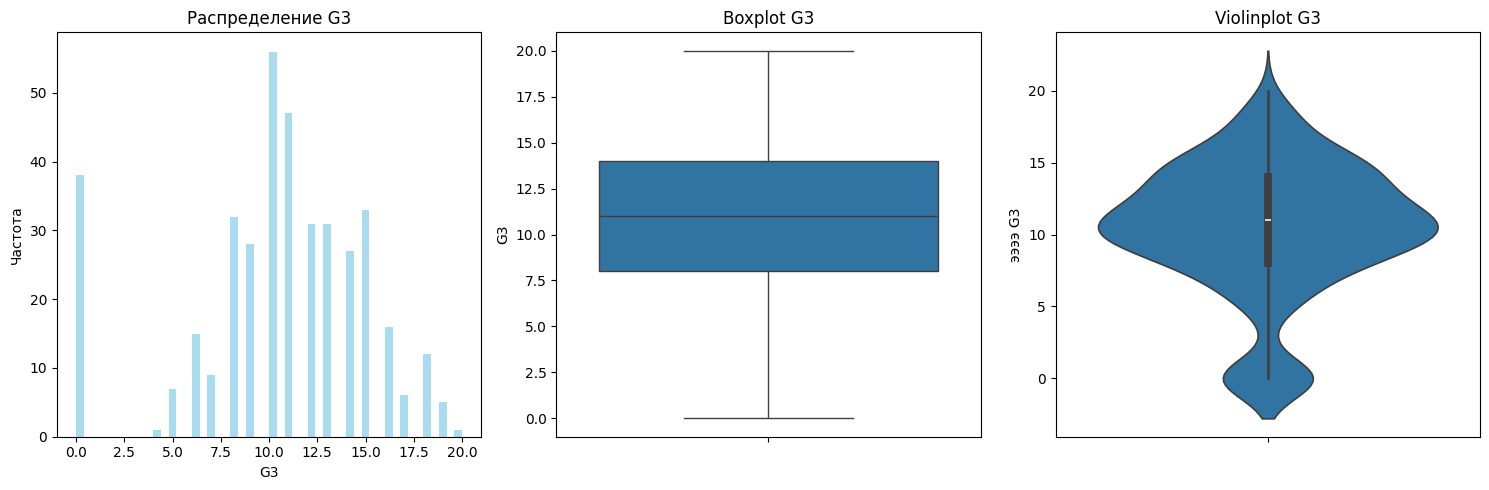

In [47]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(y, bins=50, alpha=0.7, color='skyblue')
plt.title('Распределение G3')
plt.xlabel('G3')
plt.ylabel('Частота')
plt.subplot(1, 3, 2)
sns.boxplot(y=y)
plt.title('Boxplot G3')
plt.subplot(1, 3, 3)
sns.violinplot(y=df['G3'])
plt.title('Violinplot G3')
plt.ylabel('ээээ G3')
plt.tight_layout()
plt.show()

#Спасибо что существуют старые разделы гита и я не удалял их

Видим, как и в первой лабе, что нулёвой балтики больше всех почти, пушто ну не хотят люди батрачить в учебном плане, ленивые ☝

In [48]:
from scipy.stats import shapiro

stat, p = shapiro(y)
print('Shapiro-Wilk test statistic=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Распределение, вероятно, нормальное')
else:
    print('Распределение, вероятно, не нормальное')

Shapiro-Wilk test statistic=0.929, p=0.000
Распределение, вероятно, не нормальное


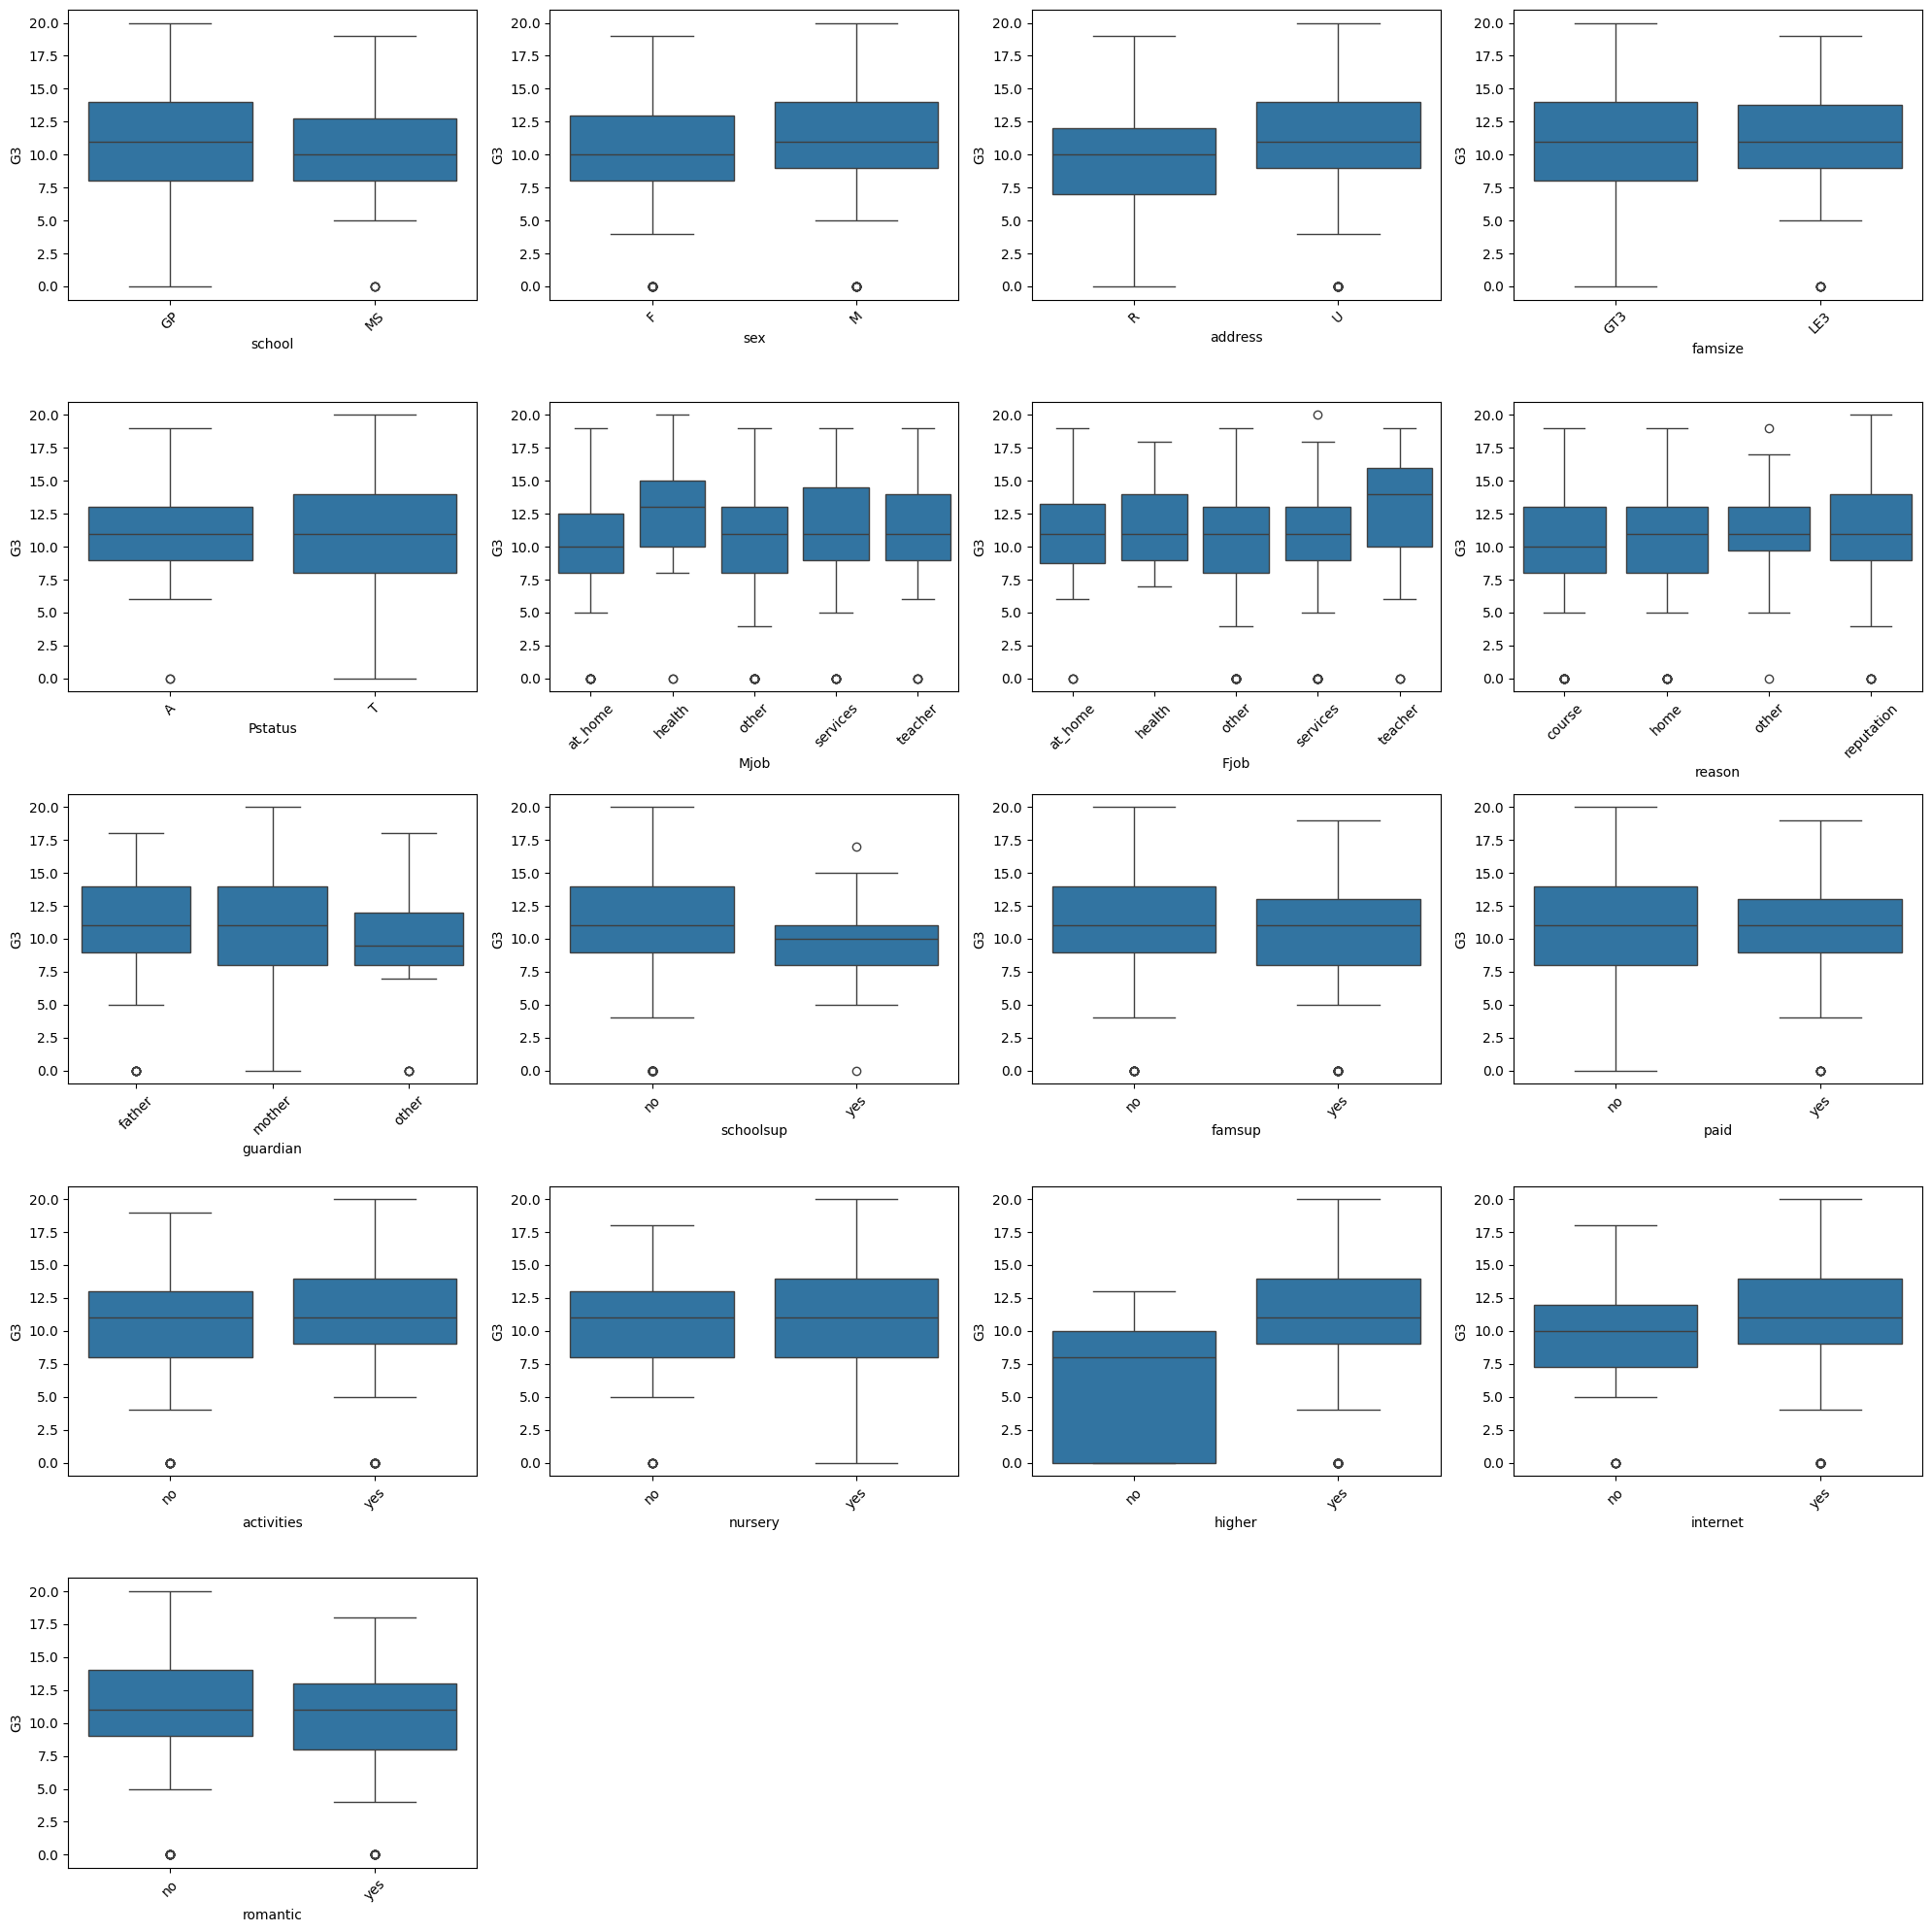

In [56]:
# Y и категориальные признаки
categorical_features = ['school', 'sex', 'address', 'famsize', 'Pstatus',
                        'Mjob', 'Fjob', 'reason', 'guardian',
                        'schoolsup', 'famsup', 'paid', 'activities',
                        'nursery', 'higher', 'internet', 'romantic']

import math

n = len(categorical_features)
cols = 4  # мне не хватает трёх потому делаем больше, нужно больше золота!
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.boxplot(data=df, x=feature, y=y, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=45)

# удаляем лишние графики, если есть
for j in range(n, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

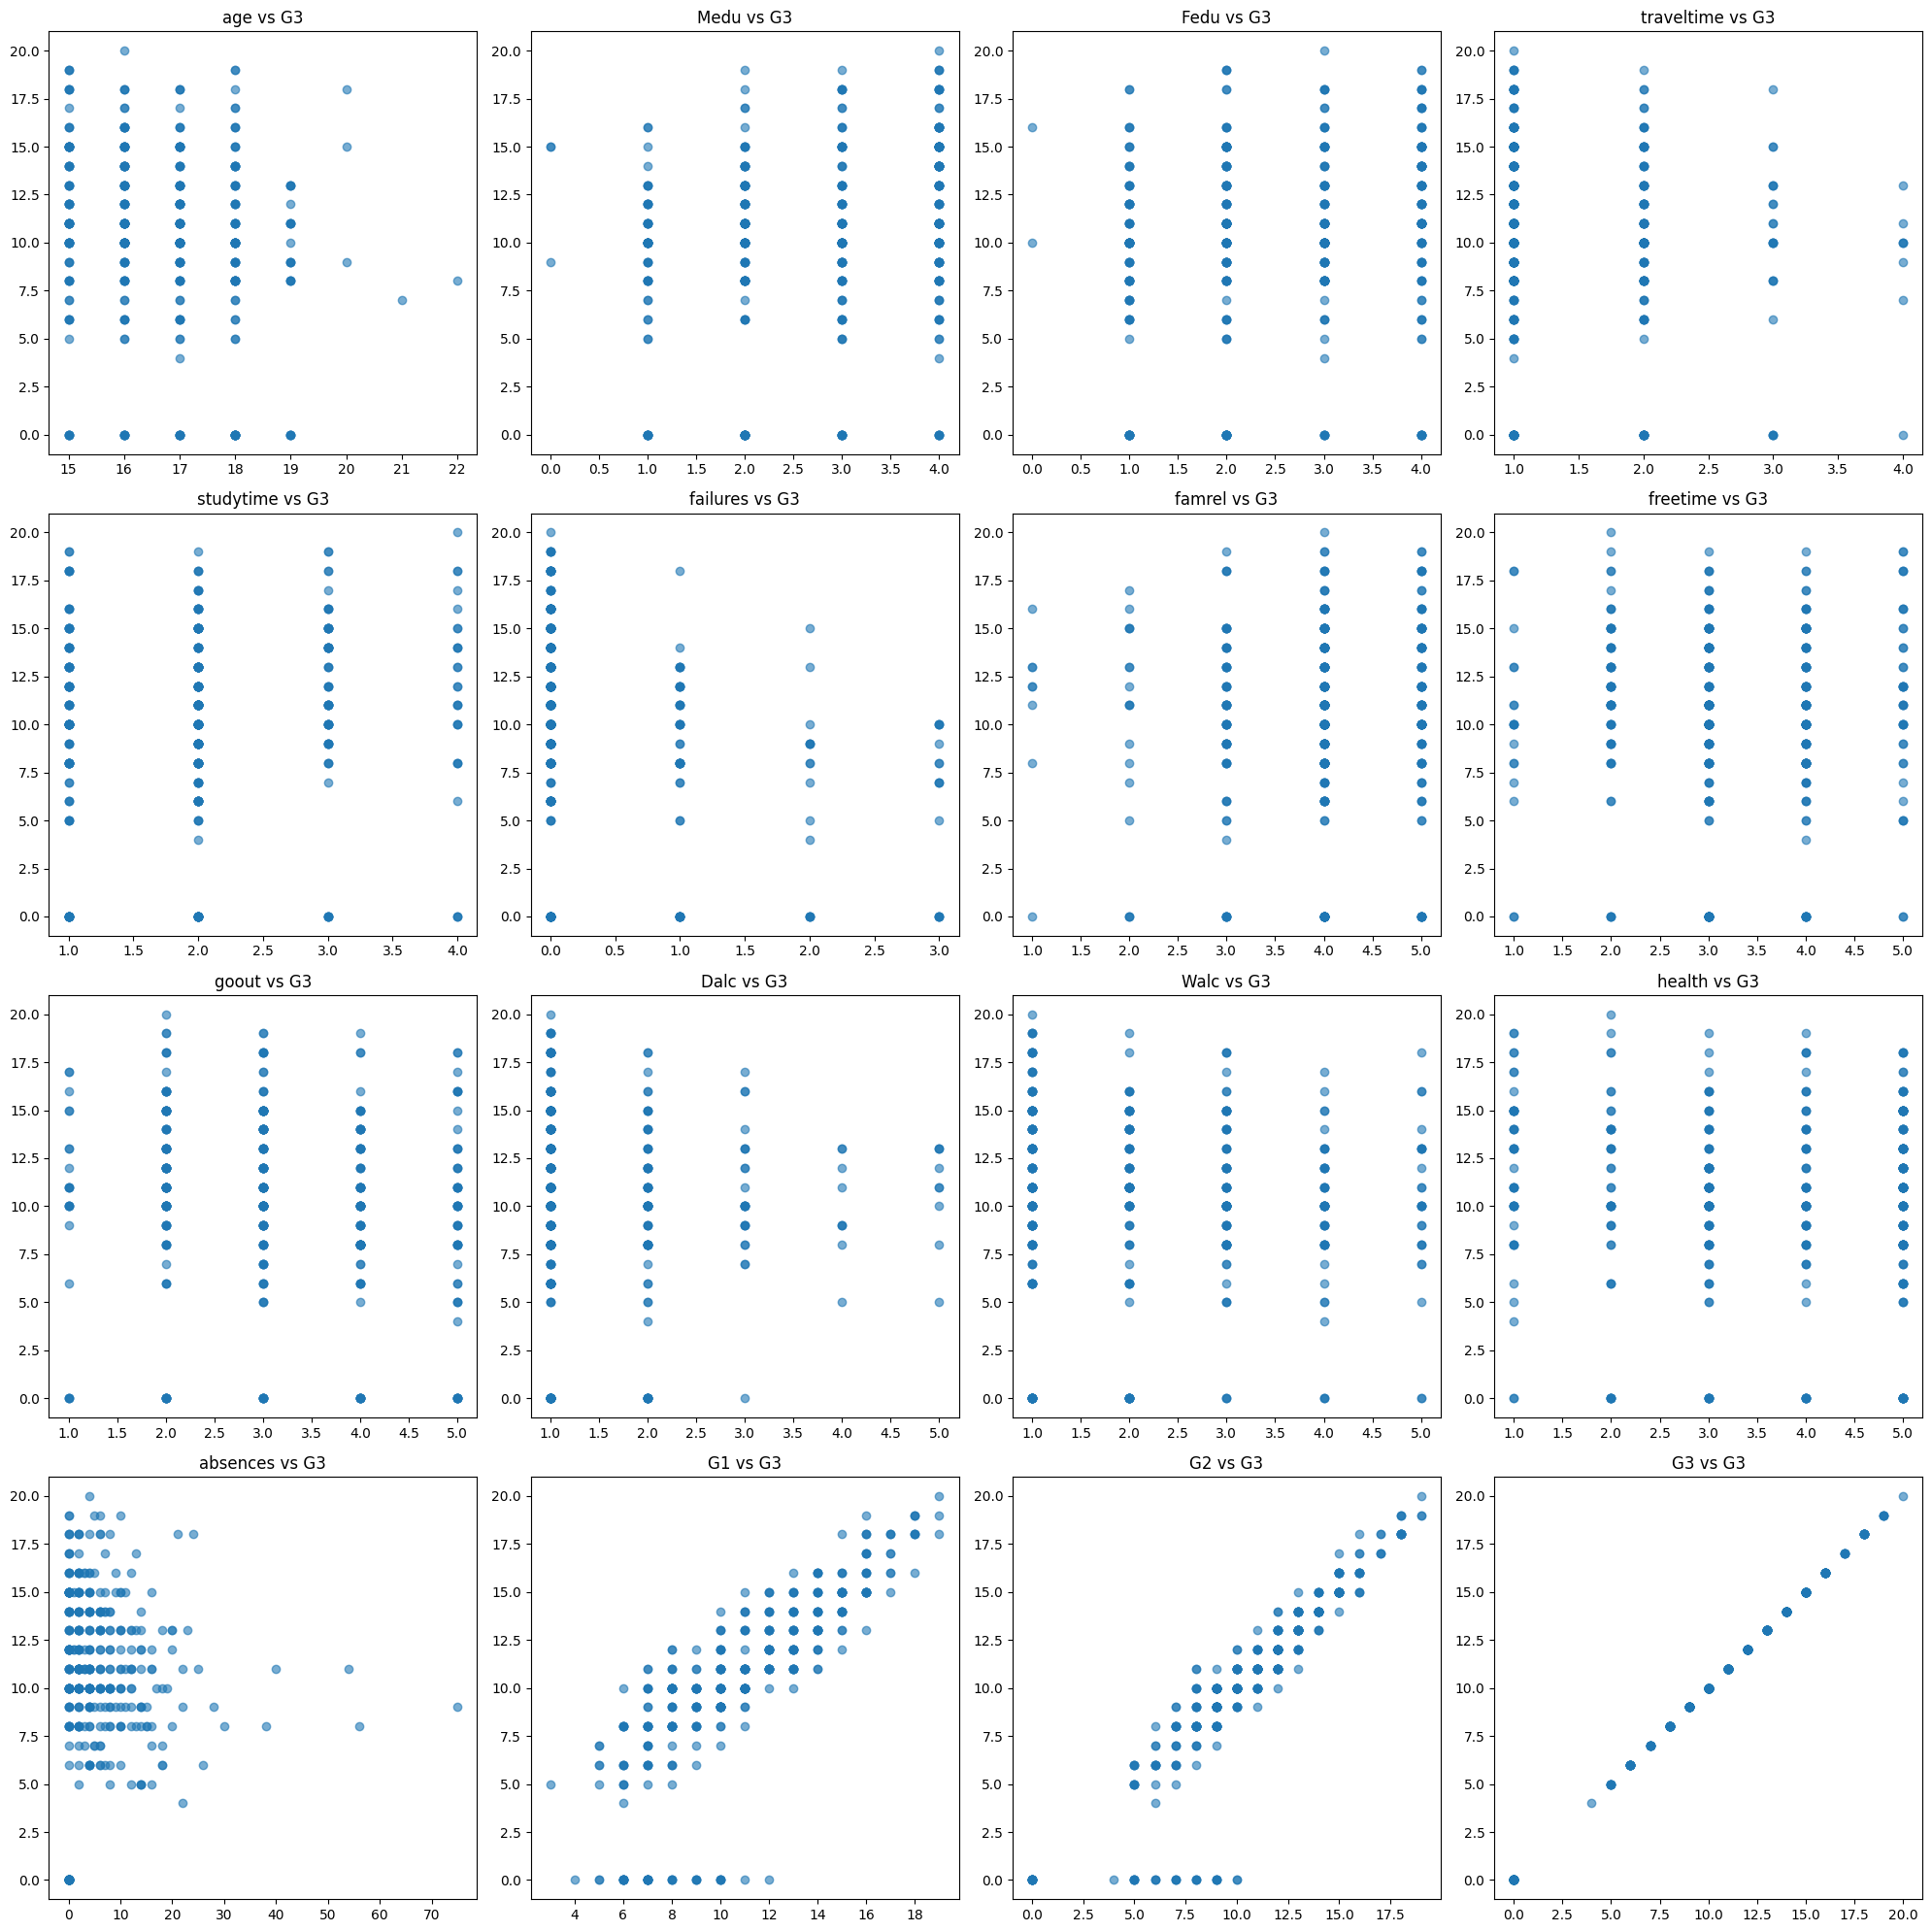

In [54]:
# Y и числовые признаки
numeric_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
    'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
    'absences', 'G1', 'G2', 'G3']

fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for i, feature in enumerate(numeric_features):
    axes[i//4, i%4].scatter(df[feature], y, alpha=0.6)
    axes[i//4, i%4].set_title(f'{feature} vs G3')
plt.tight_layout()
plt.show()

Вот и думай головой

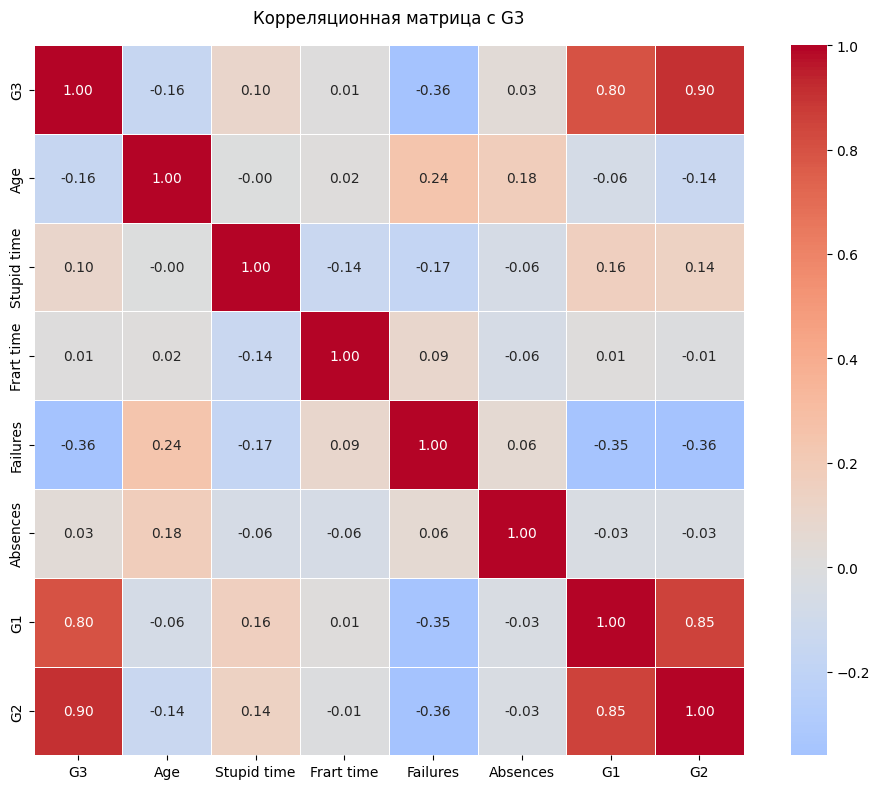

G3             1.000000
G2             0.904868
G1             0.801468
Stupid time    0.097820
Absences       0.034247
Frart time     0.011307
Age           -0.161579
Failures      -0.360415
Name: G3, dtype: float64


In [58]:
# Все, что не инт в помойку
numeric_cols = df.select_dtypes(include=['int64']).columns

# Нео в матрице
corr_matrix = pd.DataFrame({
    'G3': df['G3'],
    'Age': df['age'],
    'Stupid time': df['studytime'],
    'Frart time' : df['freetime'],
    'Failures': df['failures'],
    'Absences': df['absences'],
    'G1' : df['G1'],
    'G2': df['G2']
}).corr(method='pearson')

# Визуализация тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
           square=True, fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица с G3', fontsize=12, pad=16)
plt.tight_layout()
plt.show()

# df['age']
# df['studytime']
# df['freetime']
# df['failures']
# df['absences']
# df['G1']
# df['G2']
# df['G3']
print(corr_matrix['G3'].sort_values(ascending=False))

Ctrl+c and ctrl+v 🙈

Пропуски чуток коррелируют с возрастом, как и фейлы, видимо чем ты старше тем тебе больше всё-равно на учебу...
Ну и по базе, чем лучше оценки были, тем лучше они сохранились в следующих семестрах(не знаю семестры там или что в этой вашей Омэрикэ)
Также чем выше Freetime (Stupid time) тем лучше оценки, больше времени там на шкилу, все дела
Сделал на основе вида у ребят потому что не был на разборе лаб чуток 😫

In [62]:
categorial_features = ['school', 'sex', 'address', 'famsize', 'Pstatus',
                        'Mjob', 'Fjob', 'reason', 'guardian',
                        'schoolsup', 'famsup', 'paid', 'activities',
                        'nursery', 'higher', 'internet', 'romantic'] # перечислить названия колонок с категориальными фичами
numeric_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
    'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
    'absences', 'G1', 'G2', 'G3'] # перечислить названия колонок с категориальными фичами
best_features = categorial_features + numeric_features
print(best_features) # Почему так много(

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


## Моделирование

**Общая задача:**
Сравнить несколько вариантов линейной регрессии на датасете (с предобработкой признаков: стандартизация числовых, OneHot/Label для категориальных).

**предобработка**
- Категориальные признаки преобразовать с помощью OneHotEncoder (если признак является типом **bool** по логике можно интерпретировать как (true, false) То можно LabelEncoder)
- Числовые признаки записать в `X_scaled` и провести стандартизацию с помощью `StandardScaler`. Желательно без категориальных признаков


---
**Метрики**: (MAE, MAPE, R², MSE, RMSE)

---

**Модель 1.**

- Использовать **все признаки (кроме y)**.
- Обучить на **всей выборке** (без разделения).
- Сделать предсказания на этой же выборке.
- Вывести метрики и интерпретировать.
- Построить график коэффициентов (model.coef\_ vs X\_scaled.columns) и интерпретировать.

---

**Модель 2.**

- Использовать **все признаки**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 3.**

- Использовать только **best\_features** (отобранные признаки).
- Обучить на **всей выборке**.
- Предсказать на всей выборке.
- Вывести метрики качества и интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 4.**

- Использовать **best\_features**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики качества для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

P.S.
- Важно не забывать о стандартизации и разделении категориальных признаков на отдельные олонки
- Все примеры есть в практике 2


P.S.S
Старайтесь делать собственные предположения, ChatGPT задачу решит, но вы не добьетесь понимания полученных результатов

---
В результате должно получиться 4 модели

- первые две на всех колонках (фичах)
- последующие на отобранных фичах (колонках)

Чтоб не потерять
# https://habr.com/ru/articles/456294/ - виды Encoder для категориальных признаков
# LabelEncoder, OneHotEncoder
# Label для bool (0,1), (yes, no), (true, false)
# OneHot - для меток

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# model.fit(X, y) - обучение
# model.predict(X) - предсказание y
# model.coef_ - коэфициенты фич (каждый коэф относится по индексу к своей фиче)

# для того, чтобы не запутаться используйте следующий нейминг
model1 = LinearRegression() # модель задачи 1
model2 = LinearRegression() # модель задачи 2
... # и так далее

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np

In [77]:
#Модель 1: Все признаки на всей выборке
X_model = X.copy()
y_model = y.copy()

#Разделяем признаки
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

#Стандартизация числовых признаков
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_model[numeric_features])
X_numeric_scaled = pd.DataFrame(X_numeric_scaled, columns=numeric_features, index=X_model.index)

#OneHot кодирование категориальных признаков
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_categorical_encoded = encoder.fit_transform(X_model[categorical_features])

#Получаем названия колонок после кодирования
feature_names = []
for i, feature in enumerate(categorical_features):
    categories = encoder.categories_[i]
    for category in categories[1:]:
        feature_names.append(f"{feature}_{category}")

X_categorical_encoded = pd.DataFrame(X_categorical_encoded, columns=feature_names, index=X_model.index)

#Объединяем
X_processed = pd.concat([X_numeric_scaled, X_categorical_encoded], axis=1)

#Обучаем
model1 = LinearRegression()
model1.fit(X_processed, y_model)
y_pred1 = model1.predict(X_processed)

# Метрики
mae1 = mean_absolute_error(y_model, y_pred1)
mse1 = mean_squared_error(y_model, y_pred1)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(y_model, y_pred1)

#Готово получается?
print("Модель 1 - Все признаки на всей выборке:")
print(f"MAE: {mae1:.4f}")
print(f"MSE: {mse1:.4f}")
print(f"RMSE: {rmse1:.4f}")
print(f"R²: {r2_1:.4f}")

print(f"Размерность данных после обработки: {X_processed.shape}")

Модель 1 - Все признаки на всей выборке:
MAE: 1.1697
MSE: 3.3956
RMSE: 1.8427
R²: 0.8378
Размерность данных после обработки: (395, 15)


Ну MAE это у нас средняя абсолютная ошибка, и у нас она 1.17 грубо говоря, что не так плохо, абшибка адын так сказать
MSE это средняя квадратичная ошибка, уже побольше но не критично вроде как
RMSE это корень из средней квадратичной ошибки, вроде не такой большой вот

Всё выше короче описать можно так - это у нас показатели ошибки модели (чем меньше, тем лучше)

R^2 это кэф детерминации, показатель качества объяснения вариации, ну короче када чем ближе к 1 тем лучше а чем ниже тем хуже ыыыы) оно вышло неплохим кстати, достойно поборолся на модельке!
Качество модельки ну ээээ... Нормалдаки, пойдет

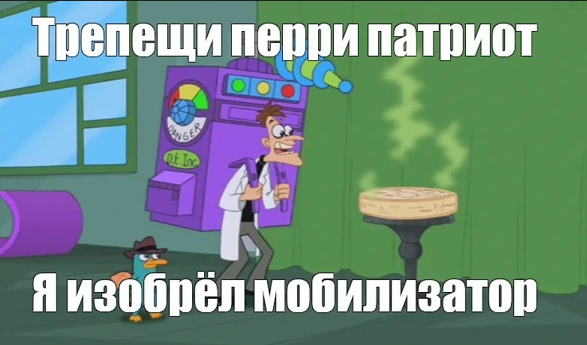

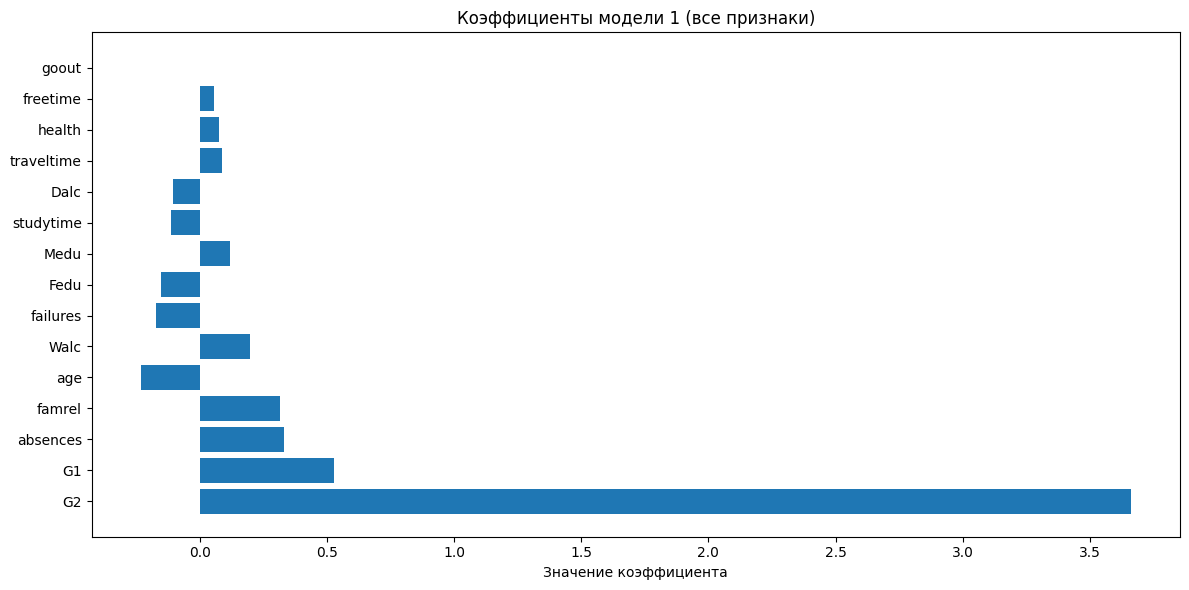

Все коэффициенты модели:
       feature  coefficient
14          G2     3.660222
13          G1     0.527198
12    absences     0.331139
6       famrel     0.314902
0          age    -0.231316
10        Walc     0.198796
5     failures    -0.172456
2         Fedu    -0.152615
1         Medu     0.116986
4    studytime    -0.114165
9         Dalc    -0.107190
3   traveltime     0.088517
11      health     0.077143
7     freetime     0.053574
8        goout     0.000496


In [79]:
#Визуализация всех коэффициентов модели 1
coef_df1 = pd.DataFrame({
    'feature': X_processed.columns,
    'coefficient': model1.coef_
}).sort_values('coefficient', key=abs, ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(range(len(coef_df1)), coef_df1['coefficient'])
plt.yticks(range(len(coef_df1)), coef_df1['feature'])
plt.title('Коэффициенты модели 1 (все признаки)')
plt.xlabel('Значение коэффициента')
plt.tight_layout()
plt.show()

print("Все коэффициенты модели:")
print(coef_df1)

Ну тут всё понятно, чем выше кэф тем эээ...
Большие коэффициенты (по абсолютной величине) — сильнее влияют на результат.
Небольшие — слабее.
Объясняет ли больше — зависит от контекста и масштабов признаков.
Потому вывод прост - G2 крутой, остальные ну так, не оч

In [80]:
# Модель 2: Все признаки с разделением на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_model, test_size=0.2, random_state=42
)

model2 = LinearRegression()
model2.fit(X_train, y_train)

# Предсказания
y_train_pred2 = model2.predict(X_train)
y_test_pred2 = model2.predict(X_test)

# Метрики
metrics_train = {
    'MAE': mean_absolute_error(y_train, y_train_pred2),
    'MSE': mean_squared_error(y_train, y_train_pred2),
    'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred2)),
    'R²': r2_score(y_train, y_train_pred2)
}

metrics_test = {
    'MAE': mean_absolute_error(y_test, y_test_pred2),
    'MSE': mean_squared_error(y_test, y_test_pred2),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred2)),
    'R²': r2_score(y_test, y_test_pred2)
}

print("Модель 2 - Все признаки с train/test split:")
print("\nОбучающая выборка:")
for metric, value in metrics_train.items():
    print(f"{metric}: {value:.4f}")

print("\nТестовая выборка:")
for metric, value in metrics_test.items():
    print(f"{metric}: {value:.4f}")

Модель 2 - Все признаки с train/test split:

Обучающая выборка:
MAE: 1.1499
MSE: 3.1792
RMSE: 1.7830
R²: 0.8486

Тестовая выборка:
MAE: 1.3482
MSE: 4.5038
RMSE: 2.1222
R²: 0.7804


Есть 2 выборки, на какую сам сядешь ...

В общем, в основной выборке RR 0.85 потому она крутая по качеству, тестовая же страдает, после обучения тестовая выборка показала более худший результат пушто я дал уточнения, и она предсказала более точно, в целом, если RR упал на тестовой, и он меньше чем на обучалке, то всё ок, всё идет своим чередом

Можно конечно сделать много уточнений, а-ля заправить модельку, дообучить её, и тогда будет лучше, но я забыл как это делать)

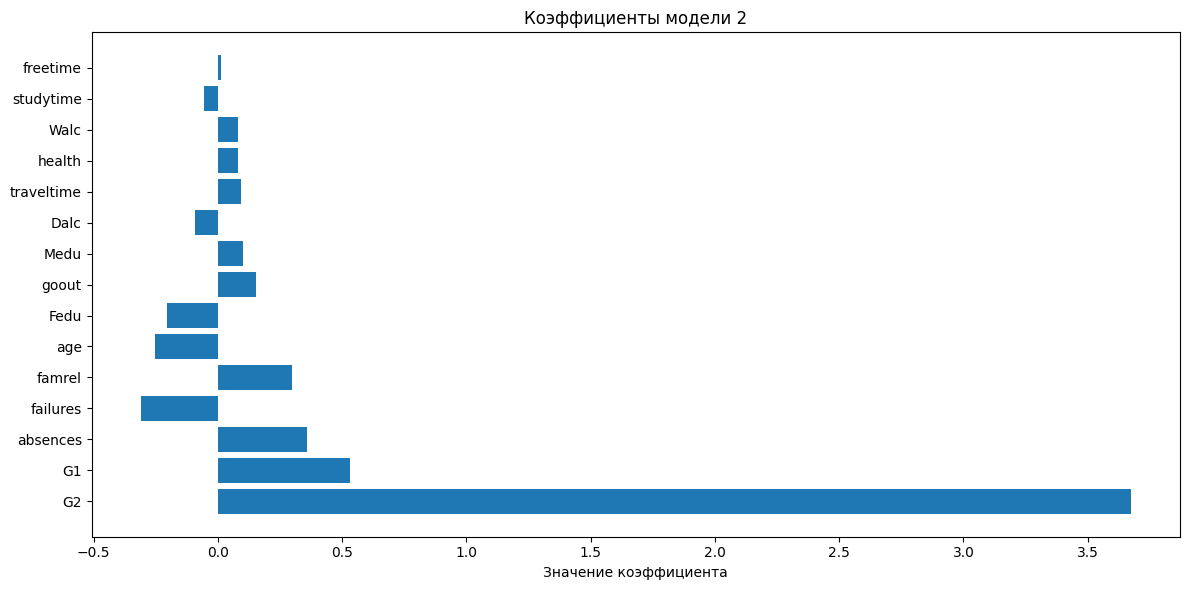

Коэффициенты модели 2:
       feature  coefficient
14          G2     3.672342
13          G1     0.532877
12    absences     0.358599
5     failures    -0.309159
6       famrel     0.299653
0          age    -0.252350
2         Fedu    -0.204690
8        goout     0.153029
1         Medu     0.102987
9         Dalc    -0.093419
3   traveltime     0.091264
11      health     0.082032
10        Walc     0.079435
4    studytime    -0.055361
7     freetime     0.010598


In [81]:
# Визуализация коэффициентов
coef_df2 = pd.DataFrame({
    'feature': X_processed.columns,
    'coefficient': model2.coef_
}).sort_values('coefficient', key=abs, ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(range(len(coef_df2)), coef_df2['coefficient'])
plt.yticks(range(len(coef_df2)), coef_df2['feature'])
plt.title('Коэффициенты модели 2')
plt.xlabel('Значение коэффициента')
plt.tight_layout()
plt.show()

print("Коэффициенты модели 2:")
print(coef_df2)

Опять видим, что G2 крутые, французские киберы молодцы ребята

In [84]:
# Модель 3: Отбор признаков
from sklearn.feature_selection import SelectKBest, f_regression

# Отбираем лучшие признаки
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X_processed, y_model)

# Получаем названия отобранных признаков
selected_mask = selector.get_support()
best_features = X_processed.columns[selected_mask]

print("Отобранные лучшие признаки:")
print(best_features.tolist())

# Модель 3: Только лучшие признаки на всей выборке
X_best = X_processed[best_features]

model3 = LinearRegression()
model3.fit(X_best, y_model)
y_pred3 = model3.predict(X_best)

# Метрики
mae3 = mean_absolute_error(y_model, y_pred3)
mse3 = mean_squared_error(y_model, y_pred3)
rmse3 = np.sqrt(mse3)
r2_3 = r2_score(y_model, y_pred3)

print("Модель 3 - Лучшие признаки на всей выборке:")
print(f"MAE: {mae3:.4f}")
print(f"MSE: {mse3:.4f}")
print(f"RMSE: {rmse3:.4f}")
print(f"R²: {r2_3:.4f}")

Отобранные лучшие признаки:
['age', 'Medu', 'failures', 'G1', 'G2']
Модель 3 - Лучшие признаки на всей выборке:
MAE: 1.1369
MSE: 3.6737
RMSE: 1.9167
R²: 0.8245


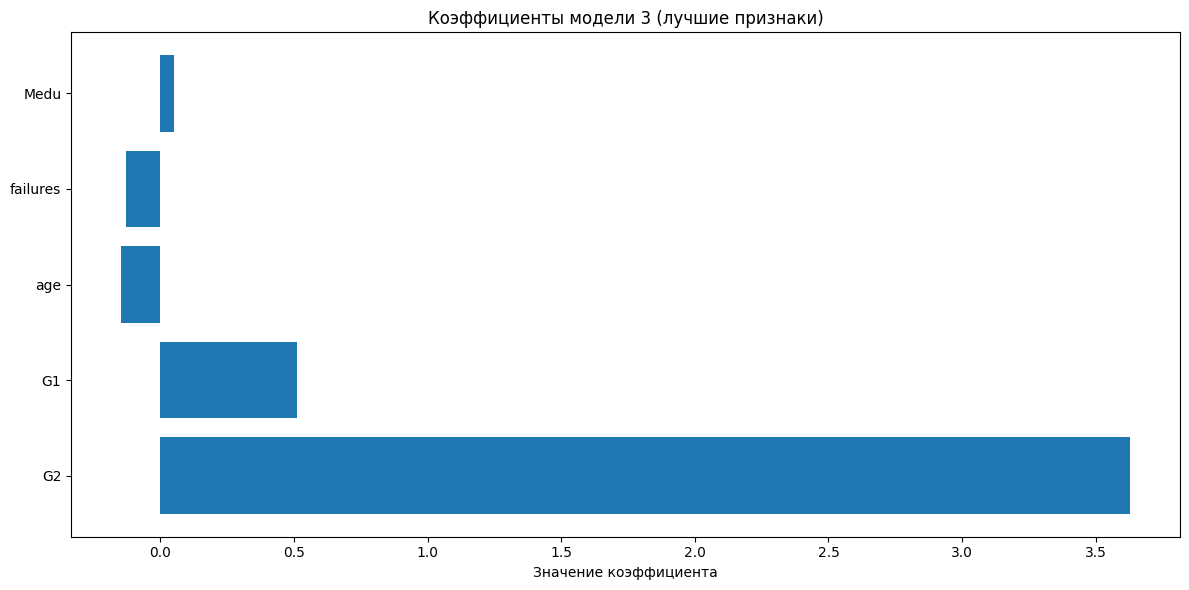

Коэффициенты модели 3:
    feature  coefficient
4        G2     3.626912
3        G1     0.510717
0       age    -0.146175
2  failures    -0.129114
1      Medu     0.052538


In [91]:
#Визуализация коэффициентов модели 3
coef_df3 = pd.DataFrame({
    'feature': best_features,
    'coefficient': model3.coef_
}).sort_values('coefficient', key=abs, ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(range(len(coef_df3)), coef_df3['coefficient'])
plt.yticks(range(len(coef_df3)), coef_df3['feature'])
plt.title('Коэффициенты модели 3 (лучшие признаки)')
plt.xlabel('Значение коэффициента')
plt.tight_layout()
plt.show()

print("Коэффициенты модели 3:")
print(coef_df3)

In [92]:
#Модель 4: Best features с разделением на train/test
#Сначала нужно определить best_features
from sklearn.feature_selection import SelectKBest, f_regression

#Выбираем лучшие признаки
selector = SelectKBest(score_func=f_regression, k=5)
X_best = selector.fit_transform(X_processed, y_model)

#Получаем названия лучших признаков
best_features_mask = selector.get_support()
best_features = X_processed.columns[best_features_mask]

print("Лучшие признаки:", best_features.tolist())

Лучшие признаки: ['age', 'Medu', 'failures', 'G1', 'G2']


In [97]:
#Разделяем данные с лучшими признаками
X_best_train = X_train[best_features]
X_best_test = X_test[best_features]

print(f"Лучшие признаки: {X_best_train.shape}, Тест: {X_best_test.shape}")


Лучшие признаки: (316, 5), Тест: (79, 5)


Разброс стал меньше, окак
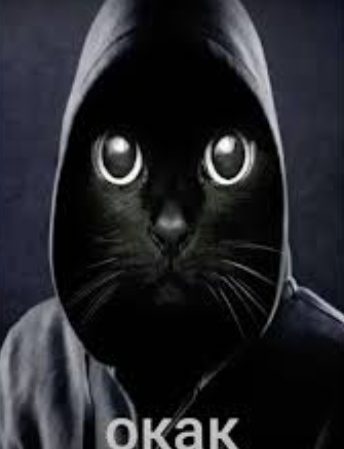

In [98]:
#Обучаем модель 4
model4 = LinearRegression()
model4.fit(X_best_train, y_train)

#Предсказания
y_train_pred4 = model4.predict(X_best_train)
y_test_pred4 = model4.predict(X_best_test)

#Метрики для train и test
mae_train4 = mean_absolute_error(y_train, y_train_pred4)
mse_train4 = mean_squared_error(y_train, y_train_pred4)
rmse_train4 = np.sqrt(mse_train4)
r2_train4 = r2_score(y_train, y_train_pred4)
mae_test4 = mean_absolute_error(y_test, y_test_pred4)
mse_test4 = mean_squared_error(y_test, y_test_pred4)
rmse_test4 = np.sqrt(mse_test4)
r2_test4 = r2_score(y_test, y_test_pred4)
print("Модель 4 - Best features с train/test split:")
print("\nОБУЧАЮЩАЯ ВЫБОРКА:")
print(f"MAE: {mae_train4:.4f}")
print(f"MSE: {mse_train4:.4f}")
print(f"RMSE: {rmse_train4:.4f}")
print(f"R²: {r2_train4:.4f}")
print("\nТЕСТОВАЯ ВЫБОРКА:")
print(f"MAE: {mae_test4:.4f}")
print(f"MSE: {mse_test4:.4f}")
print(f"RMSE: {rmse_test4:.4f}")
print(f"R²: {r2_test4:.4f}")

Модель 4 - Best features с train/test split:

ОБУЧАЮЩАЯ ВЫБОРКА:
MAE: 1.1290
MSE: 3.4890
RMSE: 1.8679
R²: 0.8339

ТЕСТОВАЯ ВЫБОРКА:
MAE: 1.2886
MSE: 4.5387
RMSE: 2.1304
R²: 0.7787


Изменения не критичны, но ошибок чуть прибавилось с уточнениями, отак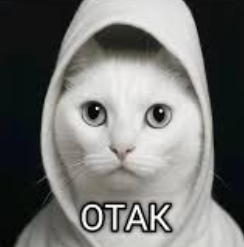

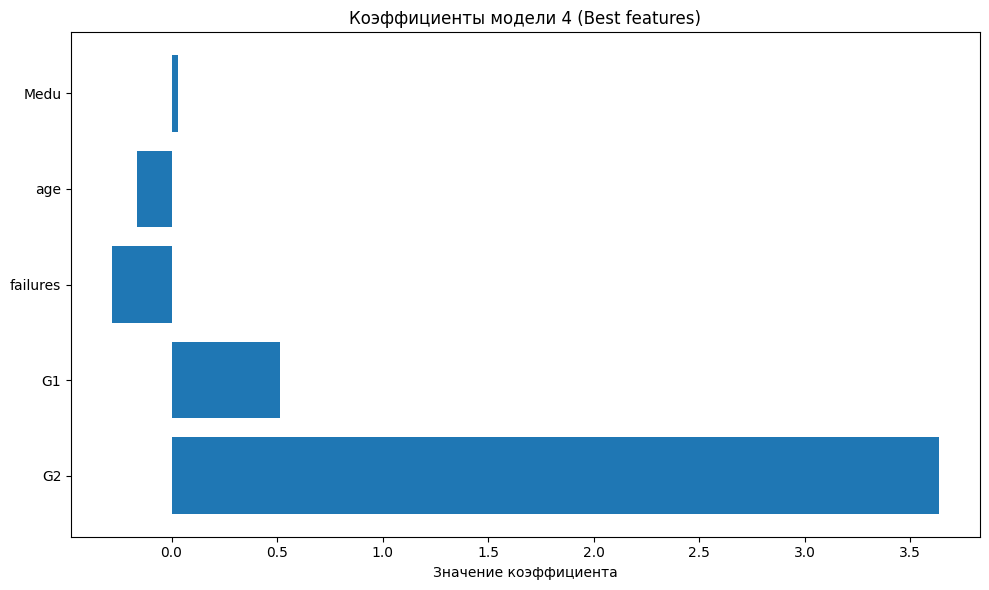

Коэффициенты модели 4:
    feature  coefficient
4        G2     3.635430
3        G1     0.512747
2  failures    -0.280833
0       age    -0.164110
1      Medu     0.028779


In [95]:
#Визуализация коэффициентов модели 4
coef_df4 = pd.DataFrame({
    'feature': best_features,
    'coefficient': model4.coef_
}).sort_values('coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(range(len(coef_df4)), coef_df4['coefficient'])
plt.yticks(range(len(coef_df4)), coef_df4['feature'])
plt.title('Коэффициенты модели 4 (Best features)')
plt.xlabel('Значение коэффициента')
plt.tight_layout()
plt.show()

print("Коэффициенты модели 4:")
print(coef_df4)